# Image Processing and Model Training - No Softmax

In [34]:
from tensorflow import keras
import numpy as np
import random
from tensorflow.image import resize
import cv2
from itertools import islice
#from sklearn.preprocessing import LabelBinarizer
#from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

## Misc Functions for use

In [35]:
## Function for showing images
# Reference: https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

def show_images(images, title_texts):
    '''Function to show set of grayscale images with titles'''
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

def show_history_loss(history):
    '''Function to show history loss after model training'''
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'test_loss'], loc='best')
    plt.show()

def show_history_accuracy(history):
    '''Function to show history accuracy after model training'''
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

## Load Images

In [36]:
# Loading dataset from keras (ref: https://keras.io/api/datasets/mnist/)
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()

# Print shapes
print('x_train shape: ', x_train.shape) # Train images
print('y_train shape: ', y_train.shape) # Train Labels
print('x_test shape: ', x_test.shape) # Test images
print('y_test shape: ', y_test.shape) # Test labels

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


### Preview loaded images

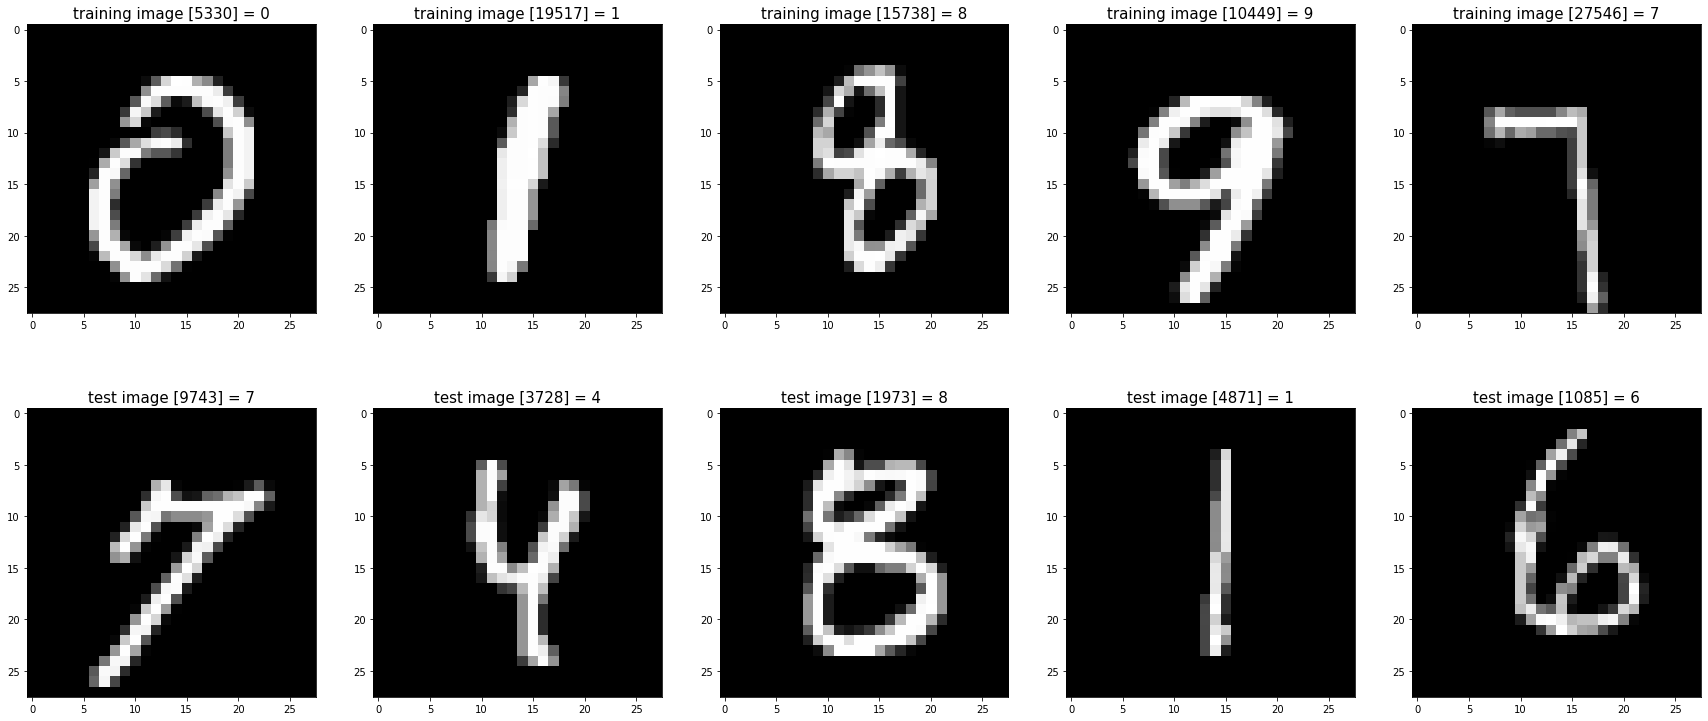

In [6]:
# Show some random training and test images 
images_show = [] # random images placeholder
titles_show = [] # random images title placeholder
for i in range(0, 5):
    r = random.randint(1, 60000)
    images_show.append(x_train[r])
    titles_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_show.append(x_test[r])        
    titles_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_show, titles_show)

## Resize images for Models

### Resize Image Function

In [37]:
def resize_and_process_images_for_model(image_set, model):
    '''Function to resize image sets based on give model'''
    if model == 'lenet5':
        images_resized = np.expand_dims(image_set, axis=-1) # Add channel
        # convert image values from integers to floats
        images_resized = images_resized.astype('float32')
        # normalization
        images_resized = images_resized/255.0
        # resize
        images_resized = resize(images_resized, [32,32], antialias=True, method='bilinear') # if we want to resize
        images_resized = images_resized.numpy() # Need to convert to numpy to prevent error when using train_test_split()

    if model == 'vgg16':
        images_resized = np.expand_dims(image_set, axis=-1) #add new dimension at the end of the array shape.
        images_resized = np.repeat(images_resized, 3, axis=-1)  # Repeat the channel dimension three times
        # convert image values from integers to floats
        images_resized = images_resized.astype('float32')
        # normalization
        images_resized = images_resized/255.0
        images_resized = resize(images_resized, [48,48], antialias=True, method='bilinear') # if we want to resize
        images_resized = images_resized.numpy() # Need to convert to numpy to prevent error when using train_test_split()
        #images_resized = np.dstack([images_resized] * 3) # Alternate method to add channels
    
    if model == 'inceptionv1':
        images_resized = np.expand_dims(image_set, axis=-1) #add new dimension at the end of the array shape.
        images_resized = np.repeat(images_resized, 3, axis=-1)  # Repeat the channel dimension three times
        # convert image values from integers to floats
        images_resized = images_resized.astype('float32')
        # normalization
        images_resized = images_resized/255.0
        images_resized = resize(images_resized, [224,224], antialias=True, method='bilinear') # if we want to resize 
        images_resized = images_resized.numpy()  # Need to convert to numpy to prevent error when using train_test_split()
        #images_resized = np.dstack([images_resized] * 3) # Alternate method to add channels
        
    print(f'Image set resized for {model}. New shape is:', images_resized.shape)
    
    return images_resized

### Resize Training Data

In [38]:
# Resize training images for LeNet5
lenet_xtrain = resize_and_process_images_for_model(x_train, 'lenet5')

Image set resized for lenet5. New shape is: (60000, 32, 32, 1)


In [39]:
# Resize training images for VGG16
vgg16_xtrain = resize_and_process_images_for_model(x_train, 'vgg16')

Image set resized for vgg16. New shape is: (60000, 48, 48, 3)


In [ ]:
# Resize training images for InceptionV1
# inceptionv1_xtrain = resize_and_process_images_for_model(x_train, 'inceptionv1')

### One Hot Encode Training Labels

In [28]:
# ONE HOT ENCODING LABEL NOT NEEDED FOR SPARSE CROSS ENTROPY

### Resize Test Data

In [40]:
# Resize training images for LeNet5
lenet_xtest = resize_and_process_images_for_model(x_test, 'lenet5')

Image set resized for lenet5. New shape is: (10000, 32, 32, 1)


In [41]:
# Resize training images for VGG16
vgg16_xtest = resize_and_process_images_for_model(x_test, 'vgg16')

Image set resized for vgg16. New shape is: (10000, 48, 48, 3)


In [13]:
# Resize training images for InceptionV1
# inceptionv1_xtest = resize_and_process_images_for_model(x_test, 'inceptionv1')

### One Hot Encode Test Labels

In [ ]:
# ONE HOT ENCODING LABEL NOT NEEDED FOR SPARSE CROSS ENTROPY

### Preview resized image for each model

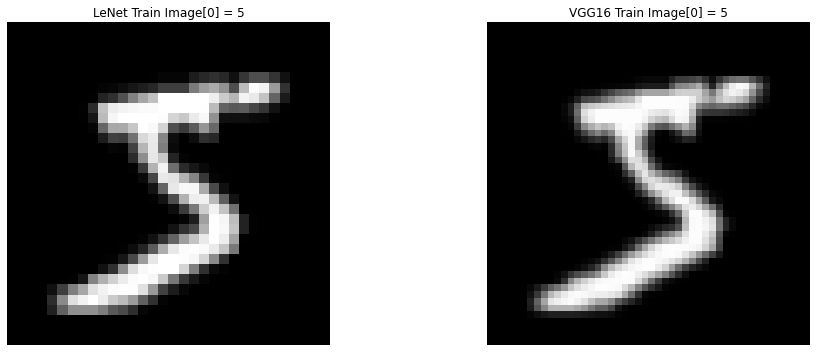

In [42]:
# Plot the images of each
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 3 columns - currently adjust to just display LeNet and VGG16

# Plot an image from LeNet training set
axes[0].imshow(lenet_xtrain[0][:, :, 0], cmap='gray')  # For grayscale image
axes[0].set_title(f'LeNet Train Image[0] = {y_train[0]}')  # Set title if needed
axes[0].axis('off')  # Turn off axis

# Plot an image from VGG16 training set
axes[1].imshow(vgg16_xtrain[0])  # For RGB image
axes[1].set_title(f'VGG16 Train Image[0] = {y_train[0]}')  # Set title if needed
axes[1].axis('off')  # Turn off axis

# # Plot an image from InceptionV1 training set
# axes[2].imshow(inceptionv1_xtrain[0])  # For RGB image
# axes[2].set_title('InceptionV1 Train Image[0] ' + y_train[0])  # Set title if needed
# axes[2].axis('off')  # Turn off axis

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Build Models

In [13]:
from LeNet5_no_softmax import *
from VGG16_pretrained_no_softmax import *
#from inceptionV1 import *

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [11]:
### LeNet5 Summary ###
# Build model
model_LeNet = LeNet() # Default settings: n_classes=10, input_shape=(32, 32, 1)

# Show model summary
print(model_LeNet.summary(), '\n')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [12]:
### VGG16 Summary ###
# Build model
model_VGG16 = VGG16_pretrained() # Default settings: n_classes=10, input_shape=(48, 48, 3)

# Show model summary
print(model_VGG16.summary(), '\n')

NOTE: All the layers are intrainable except the last layer. 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 

In [ ]:
### InceptionV1 Summary ###
# # Build model
# model_inceptionV1 = inceptionV1() # Default settings: n_classes=10, input_shape=(224, 224, 3)

# # Show model summary
# print(model_inceptionV1.summary(), '\n')

## Model Training

### Split Training Data into Train and Validation Sets

In [13]:
from sklearn.model_selection import train_test_split

# Initialize parameters
rand_seed = 12345
val_size = 0.2

In [14]:
# Create LeNet5 Training and Validation data set
lenet_train_imgs, lenet_val_imgs, lenet_train_enc_label, lenet_val_enc_label = train_test_split(lenet_xtrain, y_train, test_size=val_size, random_state=rand_seed)
print('lenet_train_imgs shape: ', lenet_train_imgs.shape)
print('lenet_val_imgs shape: ', lenet_val_imgs.shape)
print('lenet_train_labels shape: ', lenet_train_enc_label.shape)
print('lenet_val_labels shape: ', lenet_val_enc_label.shape)

lenet_train_imgs shape:  (48000, 32, 32, 1)
lenet_val_imgs shape:  (12000, 32, 32, 1)
lenet_train_labels shape:  (48000,)
lenet_val_labels shape:  (12000,)


In [15]:
# Create VGG16 Training and Validation data set
vgg16_train_imgs, vgg16_val_imgs, vgg16_train_enc_label, vgg16_val_enc_label = train_test_split(vgg16_xtrain, y_train, test_size=val_size, random_state=rand_seed)
print('vgg16_train_imgs shape: ', vgg16_train_imgs.shape)
print('vgg16_val_imgs shape: ', vgg16_val_imgs.shape)
print('vgg16_train_labels shape: ', vgg16_train_enc_label.shape)
print('vgg16_val_lablels shape: ', vgg16_val_enc_label.shape)

vgg16_train_imgs shape:  (48000, 48, 48, 3)
vgg16_val_imgs shape:  (12000, 48, 48, 3)
vgg16_train_labels shape:  (48000,)
vgg16_val_lablels shape:  (12000,)


In [ ]:
# # Create InceptionV1 Training and Validation data set
# inceptionv1_train_imgs, inceptionv1_val_imgs, inceptionv1_train_one_hot_label, inceptionv1_val_one_hot_label = train_test_split(inceptionv1_xtrain, y_train_one_hot, test_size=val_size, random_state=rand_seed)
# print('inceptionv1_train_imgs shape: ', inceptionv1_train_imgs.shape)
# print('inceptionv1_val_imgs shape: ', inceptionv1_val_imgs.shape)
# print('inceptionv1_train_labels shape: ', inceptionv1_train_one_hot_label.shape)
# print('inceptionv1_val_lablels shape: ', inceptionv1_val_one_hot_label.shape)

### Training Model Functions

In [16]:
# TRAIN FUNCTION FOR LENET
def train_lenet_model(model, batch_size=64, n_epochs=20, seed=42):
    # Determine number of samples in training and validation set
    num_train_samples = len(lenet_train_imgs)
    num_vali_samples = len(lenet_val_imgs)
    
    # Compute number of training and validation steps for each epoch
    steps_train = num_train_samples // batch_size
    steps_vali = num_vali_samples // batch_size
    
    # Add 1 more step if there are remaining samples after integer division
    if num_train_samples % batch_size != 0:
        steps_train += 1

    if num_vali_samples % batch_size != 0:
        steps_vali += 1
    
    # Start training
    return model.fit(
        lenet_train_imgs, 
        lenet_train_enc_label,
        steps_per_epoch=steps_train,
        epochs=n_epochs,
        validation_data=(lenet_val_imgs,lenet_val_enc_label),
        validation_steps=steps_vali,
        verbose=1
    )

In [20]:
# TRAIN FUNCTION FOR VGG16
def train_vgg16_model(model, batch_size=64, n_epochs=20, seed=42):
    # Determine number of samples in training and validation set
    num_train_samples = len(vgg16_train_imgs)
    num_vali_samples = len(vgg16_val_imgs)
    
    # Compute number of training and validation steps for each epoch
    steps_train = num_train_samples // batch_size
    steps_vali = num_vali_samples // batch_size
    
    # Add 1 more step if there are remaining samples after integer division
    if num_train_samples % batch_size != 0:
        steps_train += 1

    if num_vali_samples % batch_size != 0:
        steps_vali += 1
    
    # Start training
    return model.fit(
        vgg16_train_imgs, 
        vgg16_train_enc_label,
        steps_per_epoch=steps_train,
        epochs=n_epochs,
        validation_data=(vgg16_val_imgs,vgg16_val_enc_label),
        validation_steps=steps_vali,
        verbose=1
    )

In [13]:
# # TRAIN FUNCTION FOR INCEPTIONV1
# def train_inceptionv1_model(model, batch_size=64, n_epochs=20, seed=42):
#     # Determine number of samples in training and validation set
#     num_train_samples = len(inceptionv1_train_imgs)
#     num_vali_samples = len(inceptionv1_val_imgs)
    
#     # Compute number of training and validation steps for each epoch
#     steps_train = num_train_samples // batch_size
#     steps_vali = num_vali_samples // batch_size
    
#     # Add 1 more step if there are remaining samples after integer division
#     if num_train_samples % batch_size != 0:
#         steps_train += 1

#     if num_vali_samples % batch_size != 0:
#         steps_vali += 1
    
#     # Start training
#     return model.fit(
#         inceptionv1_train_imgs, 
#         inceptionv1_train_one_hot_label,
#         steps_per_epoch=steps_train,
#         epochs=n_epochs,
#         validation_data=(inceptionv1_val_imgs,inceptionv1_val_one_hot_label),
#         validation_steps=steps_vali,
#         verbose=1
#     )

### Traing the Models

In [18]:
import json

lenet_history = train_lenet_model(model_LeNet)
# Store the trained model in file
model_LeNet.save("./model_LeNet_no_softmax.h5")

# Save history to a json file
json.dump(lenet_history.history, open('lenet_history_no_softmax.json', 'w'))

Epoch 1/20
750/750 [==============================] - 15s 18ms/step - loss: 1.2566 - accuracy: 0.6359 - val_loss: 0.3675 - val_accuracy: 0.8914
Epoch 2/20
750/750 [==============================] - 15s 20ms/step - loss: 0.3396 - accuracy: 0.8959 - val_loss: 0.2720 - val_accuracy: 0.9206
Epoch 3/20
750/750 [==============================] - 15s 20ms/step - loss: 0.2548 - accuracy: 0.9221 - val_loss: 0.2169 - val_accuracy: 0.9394
Epoch 4/20
750/750 [==============================] - 15s 20ms/step - loss: 0.2078 - accuracy: 0.9368 - val_loss: 0.2109 - val_accuracy: 0.9354
Epoch 5/20
750/750 [==============================] - 15s 20ms/step - loss: 0.1725 - accuracy: 0.9480 - val_loss: 0.1594 - val_accuracy: 0.9536
Epoch 6/20
750/750 [==============================] - 15s 20ms/step - loss: 0.1497 - accuracy: 0.9537 - val_loss: 0.1441 - val_accuracy: 0.9561
Epoch 7/20
750/750 [==============================] - 15s 20ms/step - loss: 0.1328 - accuracy: 0.9586 - val_loss: 0.1434 - val_accuracy:

In [21]:
import json

vgg16_history = train_vgg16_model(model_VGG16)
# Store the trained model in file
model_VGG16.save("./model_VGG16_no_softmax.h5")

# Save history to a json file
json.dump(vgg16_history.history, open('vgg16_history_no_softmax.json', 'w'))

Epoch 1/20
750/750 [==============================] - 701s 935ms/step - loss: 0.8843 - accuracy: 0.8028 - val_loss: 0.4684 - val_accuracy: 0.8911
Epoch 2/20
750/750 [==============================] - 713s 950ms/step - loss: 0.3798 - accuracy: 0.9100 - val_loss: 0.3135 - val_accuracy: 0.9256
Epoch 3/20
750/750 [==============================] - 734s 980ms/step - loss: 0.2791 - accuracy: 0.9302 - val_loss: 0.2476 - val_accuracy: 0.9403
Epoch 4/20
750/750 [==============================] - 769s 1s/step - loss: 0.2291 - accuracy: 0.9419 - val_loss: 0.2111 - val_accuracy: 0.9465
Epoch 5/20
750/750 [==============================] - 689s 919ms/step - loss: 0.1978 - accuracy: 0.9482 - val_loss: 0.1876 - val_accuracy: 0.9526
Epoch 6/20
750/750 [==============================] - 684s 913ms/step - loss: 0.1764 - accuracy: 0.9537 - val_loss: 0.1697 - val_accuracy: 0.9557
Epoch 7/20
750/750 [==============================] - 705s 940ms/step - loss: 0.1605 - accuracy: 0.9572 - val_loss: 0.1565 - va

In [ ]:
# inceptionv1_history = train_inceptionv1_model(model_inceptionV1)
# # Store the trained model in file
# model_inceptionV1.save("./model_inceptionv1.h5")

### Save history

In [17]:
# Done above

## Evaluation


### LeNet Eval


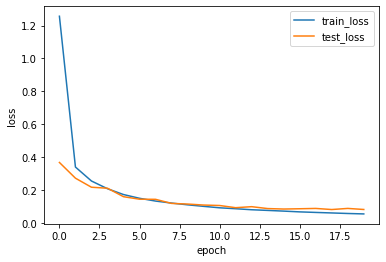

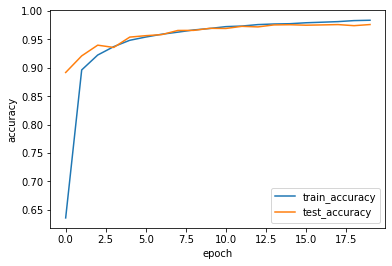

In [31]:
import json

lenet_history_dict = json.load(open('lenet_history_no_softmax.json', 'r'))
show_history_loss(lenet_history_dict)
show_history_accuracy(lenet_history_dict)

In [26]:
from keras.models import load_model
LeNet_model = load_model('model_LeNet_no_softmax.h5')

# Alternate way to test
LeNet_loss, LeNet_accuracy = LeNet_model.evaluate(lenet_xtest, y_test, verbose=1)
print("LeNet Test Accuracy:", LeNet_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0699 - accuracy: 0.9797
LeNet Test Accuracy: 0.9797000288963318


In [28]:
lenet_xtest_output = LeNet_model.predict(lenet_xtest)
lenet_xtest_preds = np.argmax(lenet_xtest_output, axis=1)
print('lenet_xtest_preds: ', lenet_xtest_preds)
print('y_test:', y_test)
# Print confusion matrix
print("LeNet Confusion Matrix:")
print(confusion_matrix(y_test,lenet_xtest_preds))

# Print classification report
print("\nLeNet Classification Report:")
print(classification_report(y_test,lenet_xtest_preds))

lenet_xtest_preds:  [7 2 1 ... 4 5 6]
y_test: [7 2 1 ... 4 5 6]
LeNet Confusion Matrix:
[[ 963    0    3    0    0    0    5    2    4    3]
 [   0 1129    2    0    0    0    2    0    2    0]
 [   1    0 1022    3    1    0    0    3    2    0]
 [   0    0    4  994    0    3    0    4    4    1]
 [   0    1    3    1  962    0    4    5    4    2]
 [   2    0    0   12    0  871    2    1    3    1]
 [   3    3    0    1    4    3  940    0    4    0]
 [   0    5    8    2    1    0    0 1011    1    0]
 [   3    1    3    4    1    2    1    2  957    0]
 [   2    5    3   10   18    3    1    9   10  948]]

LeNet Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.99   

### VGG16 Eval

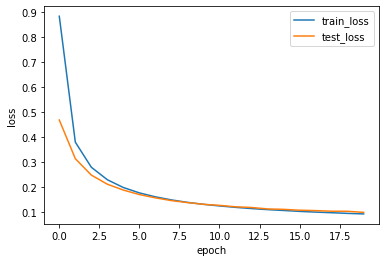

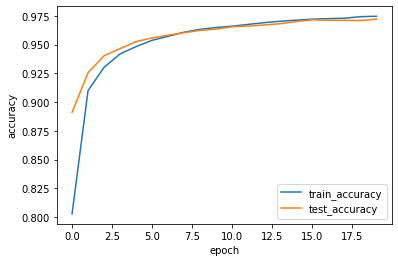

In [32]:
vgg16_history_dict = json.load(open('vgg16_history_no_softmax.json', 'r'))
show_history_loss(vgg16_history_dict)
show_history_accuracy(vgg16_history_dict)

In [30]:
from keras.models import load_model
VGG16_model = load_model('model_VGG16_no_softmax.h5')

# Alternate way to test
VGG16_loss, VGG16_accuracy = VGG16_model.evaluate(vgg16_xtest, y_test, verbose=1)
print("VGG16 Test Accuracy:", VGG16_accuracy)

313/313 [==============================] - 109s 348ms/step - loss: 0.0982 - accuracy: 0.9713
VGG16 Test Accuracy: 0.9713000059127808


In [33]:
vgg16_xtest_output = VGG16_model.predict(vgg16_xtest)
vgg16_xtest_preds = np.argmax(vgg16_xtest_output, axis=1)
print('vgg16_xtest_preds: ', vgg16_xtest_preds)
print('y_test:', y_test)

# Print confusion matrix
print("VGG16 Confusion Matrix:")
print(confusion_matrix(y_test,vgg16_xtest_preds))

# Print classification report
print("\nVGG16 Classification Report:")
print(classification_report(y_test,vgg16_xtest_preds))

vgg16_xtest_preds:  [7 2 1 ... 4 5 6]
y_test: [7 2 1 ... 4 5 6]
VGG16 Confusion Matrix:
[[ 962    0    2    0    0    6    7    0    3    0]
 [   0 1127    1    1    1    0    2    2    1    0]
 [   2    0  991    7    2    9    0    9    8    4]
 [   1    0   18  968    0   17    0    3    3    0]
 [   0    4    3    1  955    2    0    5    4    8]
 [   2    0    3   19    0  855    2    4    6    1]
 [   5    2    2    0    2    4  940    0    2    1]
 [   1    6   10    1    9    0    0  993    1    7]
 [   2    0    4    1    3    2    2    2  953    5]
 [   3    0    8    2    9    1    0   10    7  969]]

VGG16 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.97      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.95   